In [65]:
# reveal.js presentation configuration
from notebook.services.config import ConfigManager

cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'league',
              'transition': 'fade',
              'center': 'false',
              'overview' : 'true',
              'start_slideshow_at': 'selected'
})

# import utility libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 12.0)
pd.set_option('notebook_repr_html',True)
pd.set_option('display.max_rows', 10)

# pretty print function
def pp(obj):
    print pd.DataFrame(obj)
    
%matplotlib inline


# Playing with word2vec

[Fabio A. González](http://dis.unal.edu.co/~fgonza/), Universidad Nacional de Colombia

## Google News dataset

* Internal Google data set with one billion words
* 692k vocabulary. Words with frequency below 5 were discarded.
* 300-dimensions representation was obtained by training a skip-gram model.
* Model available at https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

In [2]:
## Loading the model with `gensim`

In [6]:
# import wrod2vec model from gensim
from gensim.models.word2vec import Word2Vec

# load Google News pre-trained network
model = Word2Vec.load_word2vec_format('GNvectors.bin', binary=True)

## Continuous representation of words

In [7]:
pp(model['table'])

            0
0   -0.144531
1   -0.026489
2    0.117676
3    0.213867
4   -0.042236
..        ...
295 -0.076660
296  0.069824
297 -0.095215
298 -0.098145
299 -0.012268

[300 rows x 1 columns]


## Semantically related words have similar representations

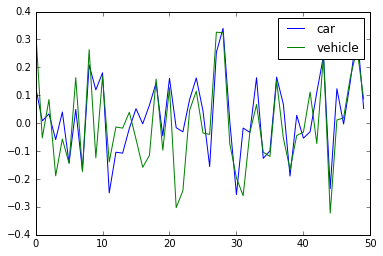

In [15]:
plt.plot(model['car'][:50], label = 'car')
plt.plot(model['vehicle'][:50], label = 'vehicle')
plt.legend()

# Vector representation similarity = semantic similarity

In [13]:
pp(model.most_similar(positive=['car']))

              0         1
0       vehicle  0.782110
1          cars  0.742383
2           SUV  0.716096
3       minivan  0.690704
4         truck  0.673579
5           Car  0.667761
6    Ford_Focus  0.667320
7   Honda_Civic  0.662685
8          Jeep  0.651133
9  pickup_truck  0.644144


## Word vector space encodes linguistic regularities

<img width= 600 src="linguistic regularities.jpg">

## Solving analogies

* **man** is to **woman** as **king** is to **??**
* Relationships are encoded by word vector differences: 
$$ f(\textrm{"woman"}) - f(\textrm{"man"}) = f(\textrm{"??"}) - f(\textrm{"king"})$$
* We can add the relationship encoding vector to a the vector of **king**: $$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

$$ f(\textrm{"king"}) + (f(\textrm{"woman"}) - f(\textrm{"man"})) = f(\textrm{"??"}) $$

In [16]:
result = model.most_similar(negative=['man'], 
                            positive=['woman', 'king'])
pp(result)

               0         1
0          queen  0.711819
1        monarch  0.618967
2       princess  0.590243
3   crown_prince  0.549946
4         prince  0.537732
5          kings  0.523684
6  Queen_Consort  0.523595
7         queens  0.518113
8         sultan  0.509859
9       monarchy  0.508741


## Calculating comparatives from adjectives

In [45]:
def plot_data(orig_data, labels):
    pca = PCA(n_components=2)
    data = pca.fit_transform(orig_data)
    plt.plot(data[:,0], data[:,1], '.')
    for i in range(len(data)):
        plt.annotate(labels[i], xy = data[i])
    for i in range(len(data)/2):
        plt.annotate("",
                xy=data[i],
                xytext=data[i+len(data)/2],
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3")
                )

In [62]:
def analogy(worda, wordb, wordc):
    result = model.most_similar(negative=[worda], 
                                positive=[wordb, wordc])
    return result[0][0]
adjectives = ['big', 'small', 'large', 'wide', 'strong']
comparatives = [analogy('good', 'better', adjective) for adjective in adjectives]
pp(zip(adjectives,comparatives))

        0         1
0     big    bigger
1   small   smaller
2   large    larger
3    wide     wider
4  strong  stronger


## Comparative vector

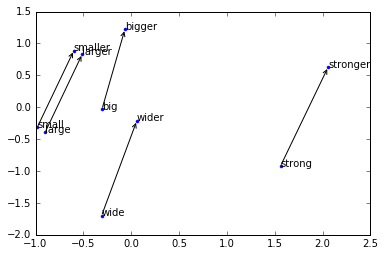

In [64]:
labels = comparatives + adjectives
data = [model[w] for w in labels]
plot_data(data, labels)

## Compositionality

In [53]:
 pp(model.most_similar(positive=['Colombia', 'currency']))

                    0         1
0           Colombian  0.621875
1                peso  0.610838
2      Colombian_peso  0.606401
3             Ecuador  0.591413
4           Venezuela  0.588154
5          currencies  0.588054
6  Venezuelan_bolivar  0.586775
7      Argentine_peso  0.580611
8        Peruvian_sol  0.578458
9      bolivar_fuerte  0.563851


#### Spanish WikiNews dataset

* Public data set with 94 million words
* 213k vocabulary (converted to lowercase, accents removed)
* 300-dimensions representation was obtained by training a cbow model

In [54]:
model_es = Word2Vec.load_word2vec_format('eswikinews.bin', binary=True)

In [59]:
 pp(model_es.most_similar(positive=['yo_soy_betty']))

                       0         1
0                    fea  0.657008
1  television_colombiana  0.646205
2            telenovelas  0.640899
3             telenovela  0.632906
4     exitosa_telenovela  0.622655
5  telenovela_colombiana  0.611013
6       caracol_noticias  0.590151
7    telenovela_mexicana  0.587966
8          solamente_vos  0.586370
9           muneca_brava  0.569259
